# Schimpfwörter #

Hypothese:
Schimpfwörter werden fehlinterpretiert wenn sie durch Sonderzeichen verschleiert werden.

Grund: Statische Analyse

In [16]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')
import csv
import re

In [17]:
#Swear_Word_Deutsch.csv
ger_swear_words = []
with open('../data/Swear_Word_Deutsch.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        ger_swear_words.append(row['Swear Word'])
# als Teilwort
def all(c):
    return True
def last_is_swearword(element):
    for ger_swear_word in ger_swear_words:
        sw = nlp(ger_swear_word)[0].lemma_
        for token in element['tokens']:
            if token.lemma_ == sw:
                return True
    return False
                
            
    return True
    hasQW = False
    for token in element['tokens']:
        for question_word in question_words:
            if question_word == token.text.lower():
                hasQW = True
        if token.pos_ == 'PUNCT' and token.text != ',':
            if token.text == '?':
                return True
            hasQW = False
    return False
def contains_no_swear_word(element):
    for ger_swear_word in ger_swear_words:
        if element['text'].lower().find(ger_swear_word.lower()) > 0:
            return False
    return True
def contains_swear_word(element):
    for ger_swear_word in ger_swear_words:
        if element['text'].lower().find(ger_swear_word.lower()) > 0:
            return True
    return False

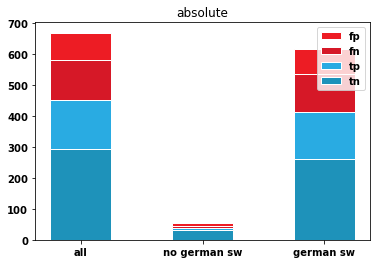

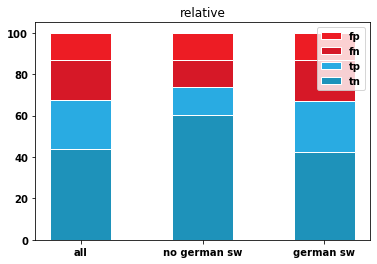

In [18]:
diagram_filters = []
diagram_filters.append(('all', all))
diagram_filters.append(('no german sw',contains_no_swear_word))
diagram_filters.append(('german sw',contains_swear_word))
#diagram_filters.append(('lemma sw',contains_question))

#name, filters, relative
create_plt(name = "absolute", filters = diagram_filters, relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)

In [19]:
print('all')
show_metrics(calc_metrics())
print('nicht Schimpfwort Deutsch')
show_metrics(calc_metrics(diagram_filters[1][1]))
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[1][1])))

all


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


nicht Schimpfwort Deutsch


,label hate (14),label nohate (39)
pred hate (14),7,7
pred nohate (39),7,32


accuracy,precision,recall,f1_score
0.7358490566037735,0.5,0.5,0.5


,label hate (287),label nohate (383)
pred hate (245),164,81
pred nohate (425),123,302


accuracy,precision,recall,f1_score
0.6955223880597015,0.6693877551020408,0.5714285714285714,0.6165413533834586
